<p style="color:dodgerblue; font-size:30px; font-weight:bold">Assignment 3</p>
<p style="color:black; font-size:50px; font-weight:bold">Data Visualization</p>
<br>
<p style="color:red; font-size:18px; font-weight:bold">March 1st, 2017</p>

### Overview
**How to submit this:** Submit this assignment through CMS.

**Objectives:** Become familiar with the data visualization using ggplot2 and other useful packages in R, and learn how to produce effective visual summary of data.

## Problem 1 - Basic Data Visualization
*Includes: plot, hist, boxplot, density plot, correlation analysis, scatterplot3d*

With the mortality rate of 3% each year, breast cancer is the second leading cause of cancer death in women. However, breast cancer can be classified into two categories depending on its behavior: either benign or malignant. Your task is to visualize the given dataset and observe what characteristics each type of breast cancer shows.

### 1-0 Initial Setup
Go to the Kaggle website (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) and download the zip file for the csv file. Store the csv file and name it “cancer”.

In [3]:
setwd("/Users/jaredlim/Desktop/Programming/R/CDS edu/")
cancer <- read.csv("breast_cancer.csv")

### 1-1 Basic Data Visualization with Histogram

We are going to do some basic data visualization with built-in functions. First, build a histogram of *area_se* variable.

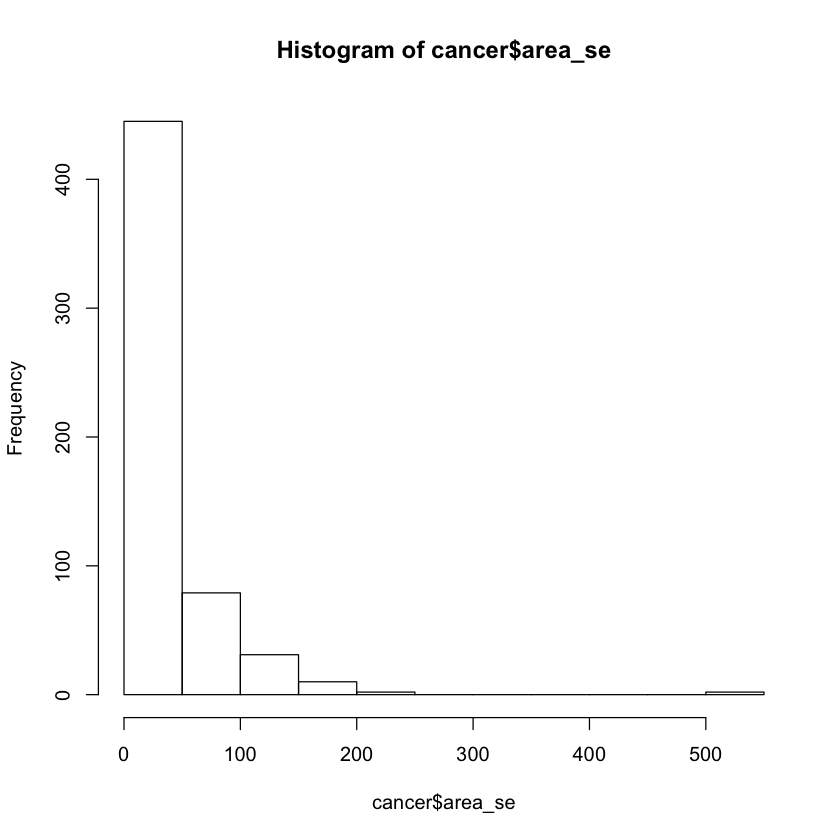

In [4]:
hist(cancer$area_se)

You will observe a big skew in your graph. Let’s adjust the x-range from 0 to 150.

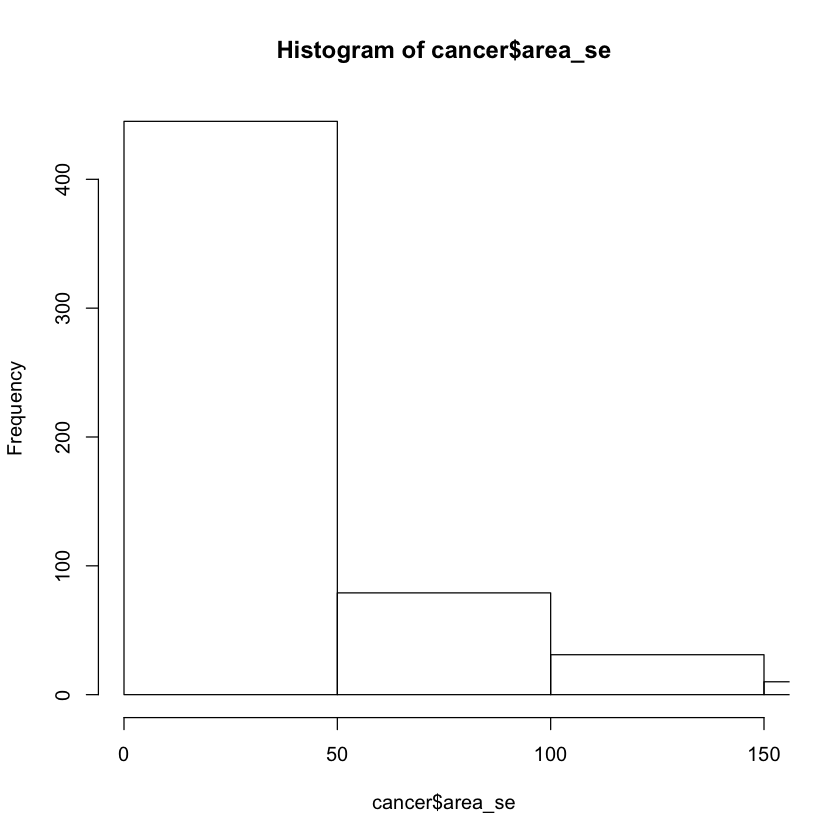

In [5]:
hist(cancer$area_se, xlim=c(0,150))

Now, the boxes seem to be too thick to visualize the details. Choose a reasonable number of breaks so that the bar width becomes 10. (This means that you should see 5 bars in each 50 intervals.)

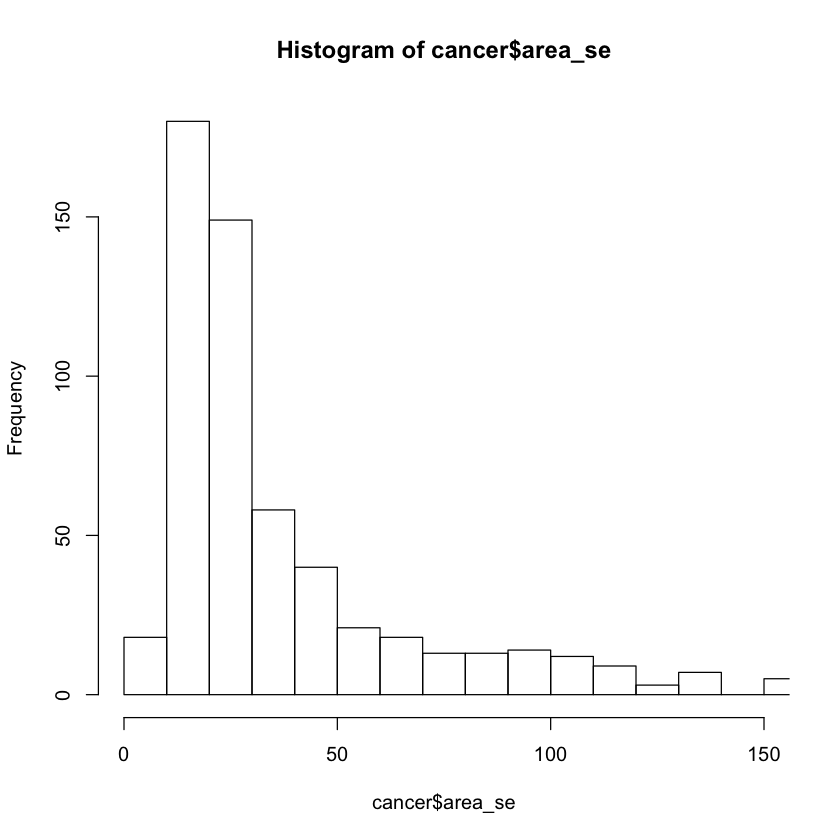

In [6]:
hist(cancer$area_se, xlim=c(0,150), breaks = 40)

### 1-2 Density Plot

For this sub-problem, change our histogram to the density plot. In other words, make a density plot for *area_se* and set the x range from 0 to 150.

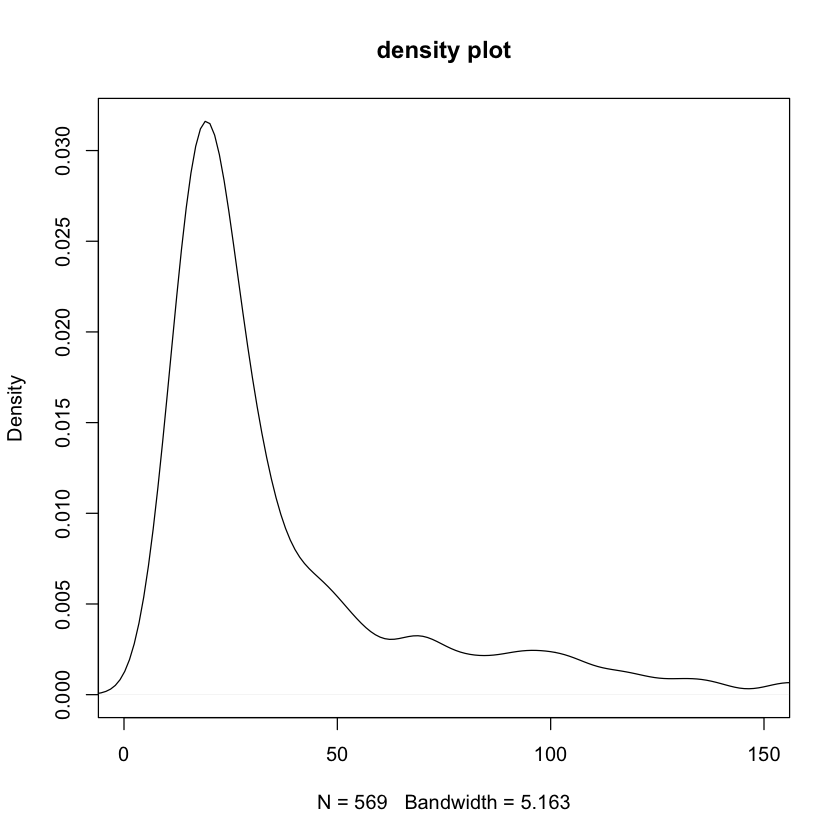

In [7]:
plot(density(cancer$area_se), main = "density plot", xlim=c(0,150))

### 1-3 Correlation Analysis

Let's do the correlation analysis among *compactness_mean, concavity_mean, concave.points_mean*, and *symmetry_mean*. Which two variables show the highest correlation?

In [8]:
cor(cancer[8:11])
# concavity_mean and concave.points_mean

compactness_mean concavity_mean concave.points_mean
compactness_mean    1.0000000        0.8831207      0.8311350          
concavity_mean      0.8831207        1.0000000      0.9213910          
concave.points_mean 0.8311350        0.9213910      1.0000000          
symmetry_mean       0.6026410        0.5006666      0.4624974          
                    symmetry_mean
compactness_mean    0.6026410    
concavity_mean      0.5006666    
concave.points_mean 0.4624974    
symmetry_mean       1.0000000

Let's make a plot using built-in plot function with the two variables that you indicated above.

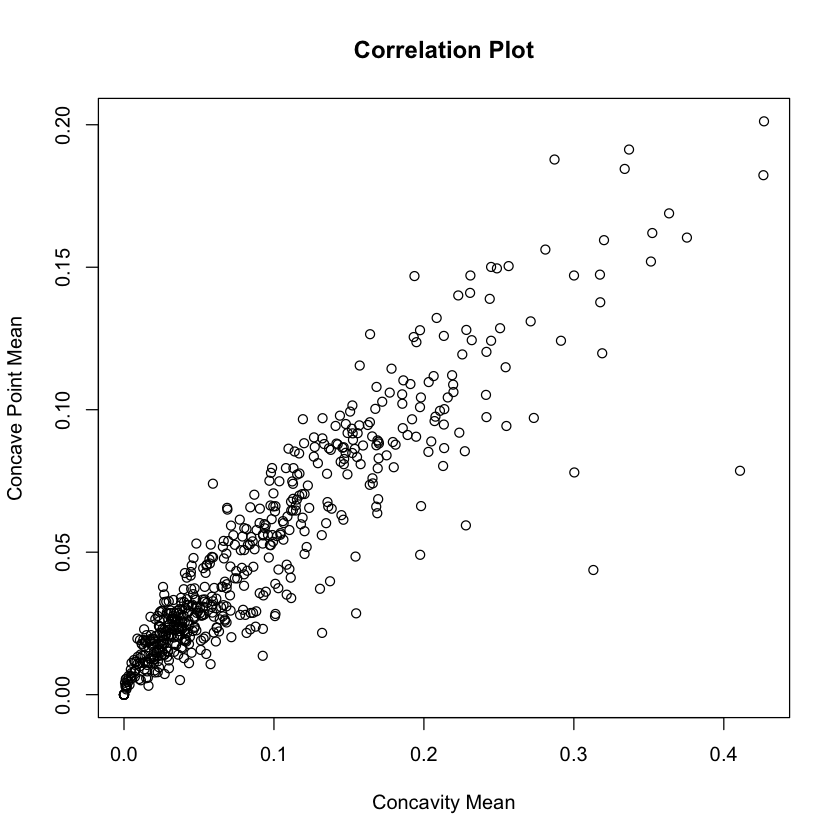

In [9]:
plot(cancer$concavity_mean, cancer$concave.points_mean, main = "Correlation Plot", xlab = "Concavity Mean", ylab = "Concave Point Mean")

### 1-4 Make GG Plot Again

So far we have used the built-in visualizations. They are easy, basic, and can be done with, perhaps 1 year of programming experience. But somehow, they are really unintuitive and cumbersome, and I, ~~Grie~~ Data Scientist, want to make something better.

Let's change the previous plot into ggplot. Create a ggplot using same variables as 1-3, and add colors to the points so that we can distinguish the Benign ones and Malignant ones.

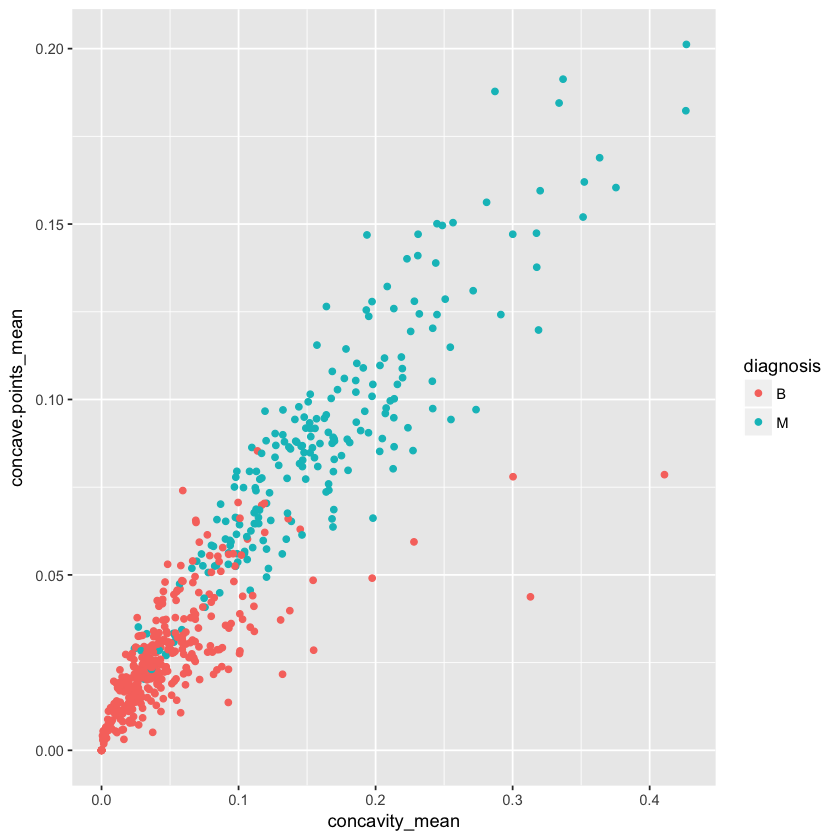

In [10]:
library(ggplot2)
ggplot(data= cancer, aes(x = concavity_mean, y = concave.points_mean, color = diagnosis)) + geom_point()

### 1-5 Box Plot

I love box plots because it was the first thing I learned when I took AP Statistics back in the good old days (Just kidding. It has been only a year for me since I took it in high school).
But drawing them by hands is a pain.

So let's make a box plot using R. Make a boxplot of *radius_worst* by *diagnosis*. In other words, your plot should have two boxplots in one picture, one for Benign cancer and the other for Malignant cancer. Use ggplot for this question.

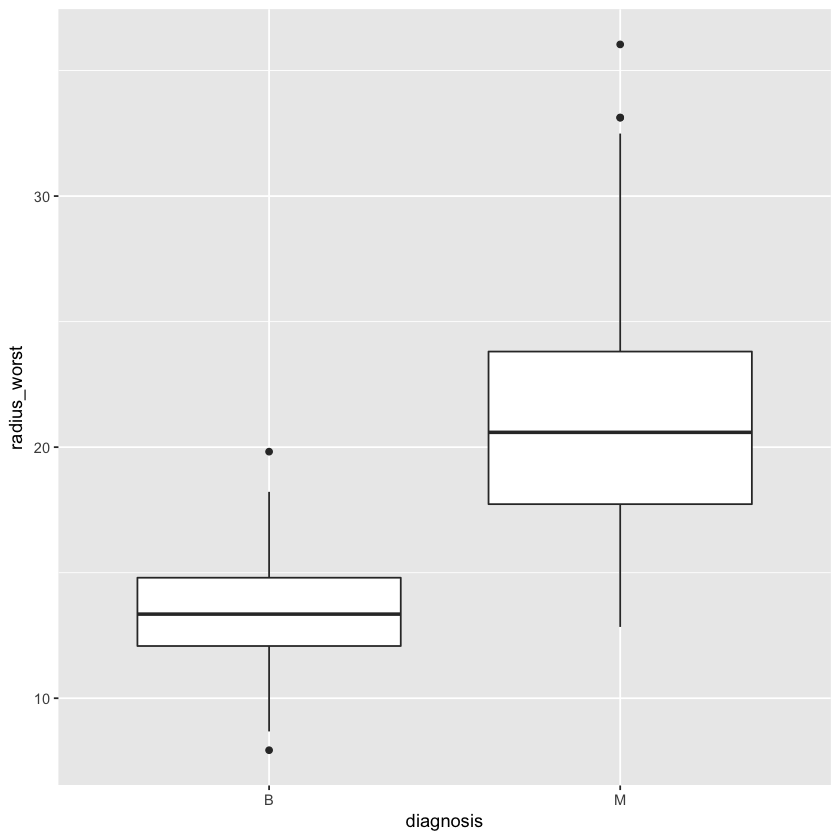

In [11]:
ggplot(cancer, aes(diagnosis, radius_worst)) + geom_boxplot()

### 1-6 Scatterplot 3D

I know solving problems takes a long time, and some of you will be cursing by now, but please understand that making questions also takes a long time. I'm also suffering. It's all for the sake of learning. Keep it up.

The last thing you will be doing for Problem 1 is Scatterplot 3D. Make a 3d scatterplot of *texture_worst (x-axis), radius_worst (y-axis)*, and *concave.points_worst (z-axis)*. Color Benign one with darkgreen, and malignant one with red. Choose a proper name for the plot.

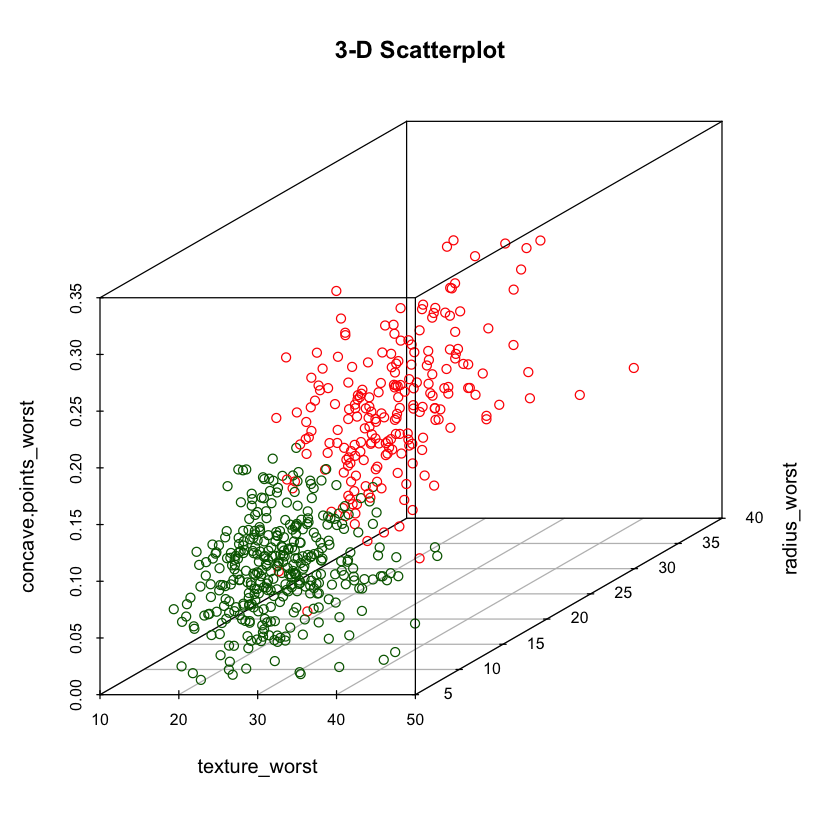

In [15]:
library(scatterplot3d)
library(dplyr)

cancerScatter <- mutate(cancer, Color = as.character(diagnosis))
cancerScatter$Color <- sapply(cancerScatter$Color, function(x){
  if (x=="B"){return("darkgreen") }
  else return("red")
})

with(cancerScatter, {
  scatterplot3d(texture_worst,          # x axis
                radius_worst,           # y axis
                concave.points_worst,   # z axis
                main="3-D Scatterplot",
                color = Color)
})

<br>
## Problem 2 - Advanced Data Visualization
*Includes : map, contour plot, plotly*

I'm supposed to write an introductory paragraph for each new problem that I make (just like Problem 1), but it's a prelim week for me as well, I'm quite overwhelmed by the amount of my workload, ~~and rip my gpa~~, so I will skip the introduction paragraph and directly go to the question.


### 2-0 Initial Setup
Go to the Kaggle website (https://www.kaggle.com/c/predict-west-nile-virus/data) and download the **train.csv.zip** file for the csv file. Store the csv file and name it “nile”.

In [16]:
nile <- read.csv("nile.csv")

### 2-1 Map Map
There are different types of maps around us. World map, roadmap, Bitmap, HashMap, Karnaugh Map, ...

This time, we are going to make a map using the dataset given and plot the points onto the map.
Create a google "satellite" map of the location Chicago IL, with the zoom factor 11.

Source : https://maps.googleapis.com/maps/api/staticmap?center=Chicago&zoom=11&size=640x640&scale=2&maptype=satellite&language=en-EN
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Chicago


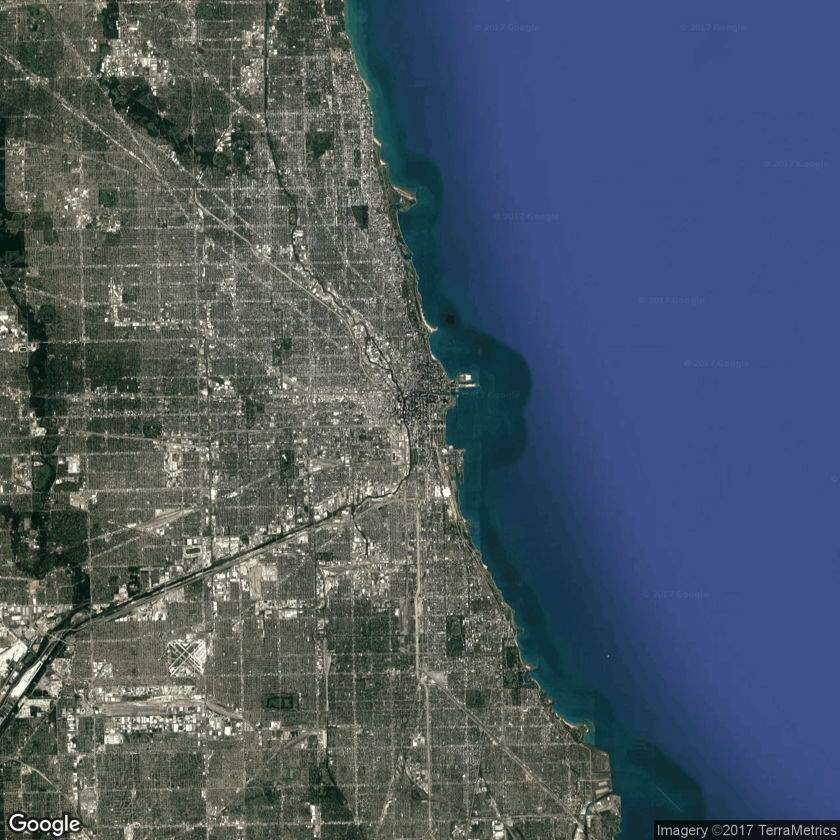

In [18]:
library(ggmap)
mt <- qmap("Chicago", zoom = 11, maptype = "satellite")
mt

Now, add the points from our dataset to the map. Set the point color to red.

Warning message:
“Removed 2741 rows containing missing values (geom_point).”Warning message:
“Removed 2741 rows containing missing values (geom_point).”

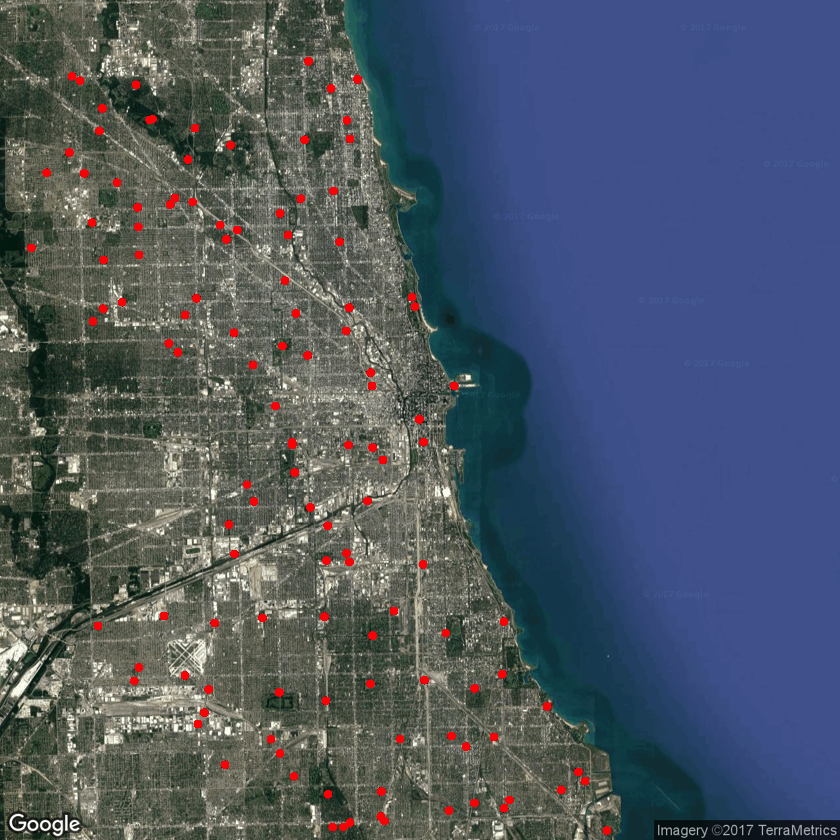

In [20]:
mt <- mt + geom_point(data=nile, aes(x=Longitude,y=Latitude), color = "red")
mt

### 2-2 Contour Plot

Now, let's add a contour map to our previous map, using Longitude and Latitude. The final result should contain both the red points from 2-1 and the contours.

Warning message:
“Removed 2741 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 2741 rows containing missing values (geom_point).”Warning message:
“Removed 2741 rows containing missing values (geom_point).”

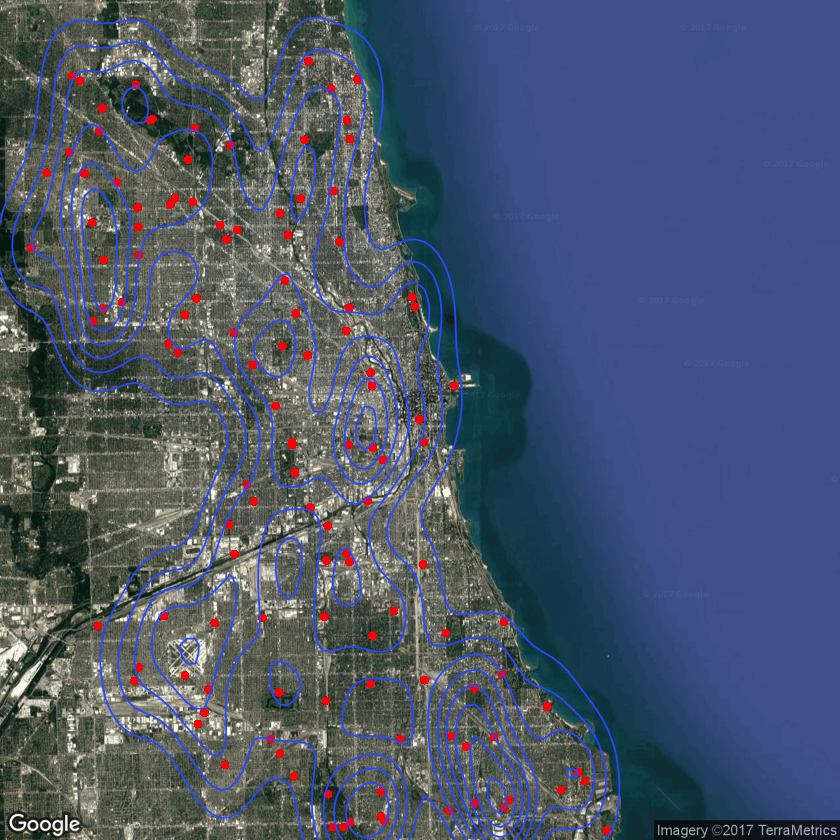

In [21]:
mt <- mt + geom_density2d(data=nile, aes(x=Longitude,y=Latitude))
mt

### 2-3 Interactive Plotly
We are almost done! Let's make an interactive plot for this last sub-problem.

Use plotly package to build a simple plot using same variables that you chose in 1-3. Use ggplot first to construct the plot.

In [29]:
library(plotly)
x <- ggplot(data = cancer, aes(x = concavity_mean, y = concave.points_mean)) + geom_point()
ggplotly(x)
## need to install pandoc

HTML widgets cannot be represented in plain text (need html)

Nice work. Hope you all succeed in your prelims and see you next week (or tomorrow if you have waited until Tuesday night to finish it :) It's okay. It happens to me everytime as well).

<br>
## Karma
Optional problems for additional practice

### K-1 Polar Graphs
Construct an R animation that draws r = sin(3θ) from 0 <= θ <= π and save it to a GIF file.

![](https://docs.google.com/uc?id=0B48p6TjIEUWZQ0ZNQUFpdlJpOGc)

In [ ]:
# sample solution
library(animation)

saveGIF({
  
  ani.options(interval = 0.2, nmax = 200)
  
  t = seq(0,pi,.01)
  
  r = sin(3 * t)
  x = r * cos(t)
  y = r * sin(t)
  
  idx = seq(1,length(x),10)
  
  for (i in seq_along(idx)) {
    
    plot(x,y,type="n")
    
    points(x[seq(idx[i])],
           y[seq(idx[i])], pch=15, col="dark blue")
    
    ani.pause() }
  
}, movie.name = "polar sin.gif",

ani.width = 600, ani.height = 600)